# This data project has been used as a take-home assignment in the recruitment process for the data science positions at Apollo Hospitals.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from scipy import stats

In [66]:
df = pd.read_csv('apollo_data.csv')

df.head()
data=df.copy()


Data Cleaning

In [67]:
df.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

Since there is no null values so we can proceed with Plots

In [68]:
# Converting categorical values into numerical
label_encoder = LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,0,1,3,9.30,0,42212
1,18,1,0,2,11.26,1,4314
2,28,1,0,2,11.00,3,11124
3,33,1,0,1,7.57,0,54961
4,32,1,0,1,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,1,0,1,10.32,3,26501
1334,18,0,0,0,10.64,0,5515
1335,18,0,0,2,12.28,0,4075
1336,21,0,0,3,8.60,0,5020


Unvariate Analysis

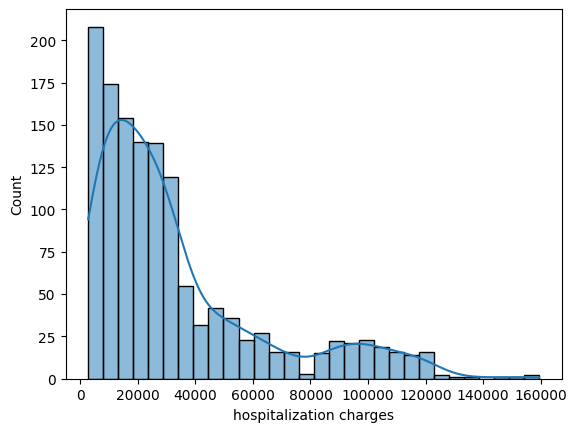

In [69]:
sns.histplot(df['hospitalization charges'],kde = True)
plt.show()

Bivariate Analysis

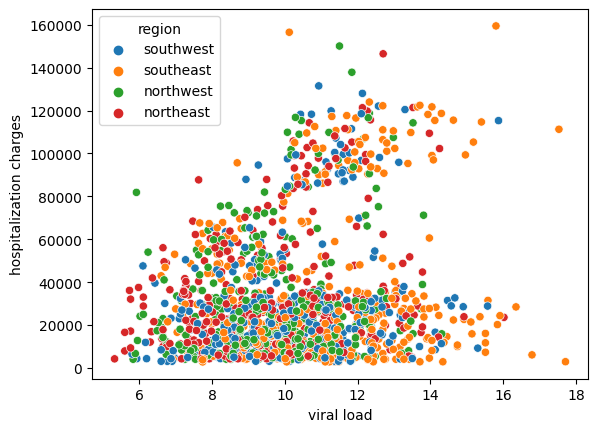

In [70]:
#sns.scatterplot(x = 'viral load', y = 'hospitalization charges', hue = 'region', data = df)
sns.scatterplot(x = 'viral load', y = 'hospitalization charges', hue = 'region', data = data)
plt.show()

Statistical Testing - ANOVA 

In [71]:
# Test if hospitalization charges vary by region (ANOVA)
anova_results = stats.f_oneway(df['hospitalization charges'][df['region'] == 0],
                               df['hospitalization charges'][df['region'] == 1],
                               df['hospitalization charges'][df['region'] == 2],
                               df['hospitalization charges'][df['region'] == 3])
#print(f"ANOVA Results for Hospitalization Charges across Regions: {anova_results}")

if anova_results.pvalue < 0.05:
    print("There is a significant difference in the hospitalization charges and region")
else:
    print("There is no significant difference in the hospitalization charges across regions")

There is a significant difference in the hospitalization charges and region


Heatmap Distribution

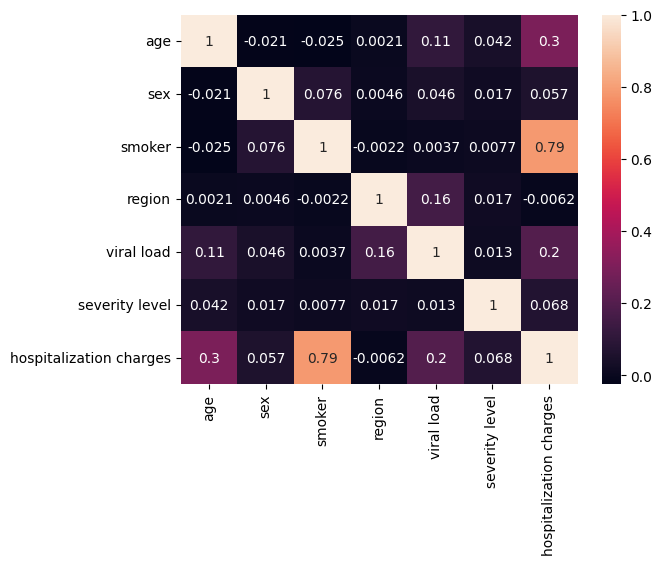

In [72]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Model Testing

In [73]:
X = df[['age','sex','smoker','region','viral load','severity level']]
y = df['hospitalization charges']
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Prediction Results 

In [74]:
y_pred = model.predict(X_test)
print(f'R2_score is {r2_score(y_test, y_pred)}')



R2_score is 0.7833426680693367
